In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
import src

In [2]:
# Social network construction
distance_matrix = np.load("../temp/laurelhurst_distance_matrix.npy")

# create community
laurelhurst = src.Community()

# add nodes
laurelhurst.add_nodes_from(range(distance_matrix.shape[0]))

# node resource inventory
resource_pmf = np.loadtxt("../temp/laurelhurst_transp_resource_distr")
laurelhurst.generate_resource_inventory(amount=[0, 1, 2, 3, 4, 5, 6, 7], pmf=resource_pmf, name='transp', seed=0)

# node sharing preference
share_preference_pmf = np.loadtxt("../temp/laurelhurst_transp_share_pref_distr")
laurelhurst.generate_sharing_preference(recipient=[0, 1, 2, 3], pmf=share_preference_pmf, name='transp_share_preference', seed=10)

# add edges
degree_list = np.random.negative_binomial(0.78773808, 0.02559534, size=distance_matrix.shape[0])
laurelhurst.generate_social_ties(degrees=degree_list, distance_matrix=distance_matrix, distance_decay_alpha=-1.35, seed=20)
laurelhurst.split_social_ties(types=["strong", "weak"], pmf=[0.4129, 0.5871])

# create resource sharing network
G = laurelhurst.get_share_network(sharing_preference='transp_share_preference', priority=[3, 2, 1])
priority_matrix = laurelhurst.get_share_priority_matrix(sharing_preference='transp_share_preference')

/Users/lzy95/Documents/GitHub/Peer-to-peer-community-sharing/test/../src/community.py:171: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(self).todense()


In [3]:
print(np.sum(laurelhurst.social_tie_matrix()))
print(np.sum(laurelhurst.social_tie_matrix(type='strong')))
print(np.sum(laurelhurst.social_tie_matrix(type='weak')))
print(np.sum(laurelhurst.social_tie_matrix(type='strong')) / np.sum(laurelhurst.social_tie_matrix()))

52100
21760
30340
0.417658349328215


In [4]:
len(G.edges())

1272617

In [5]:
distance_matrix.shape[0] ** 2

3508129

In [6]:
len(G.edges()) / (distance_matrix.shape[0] * (distance_matrix.shape[0]-1))

0.36295609904125653

In [7]:
share_preference_pmf

array([0.02371542, 0.18972332, 0.43478261, 0.35177866])

In [8]:
# Social network construction
distance_matrix = np.load("../temp/southpark_distance_matrix.npy")

# create community
southpark = src.Community()

# add nodes
southpark.add_nodes_from(range(distance_matrix.shape[0]))

# node resource inventory
resource_pmf = np.loadtxt("../temp/southpark_transp_resource_distr")
southpark.generate_resource_inventory(amount=[0, 1, 2, 3, 4, 5, 6, 7], pmf=resource_pmf, name='transp', seed=0)

# node sharing preference
share_preference_pmf = np.loadtxt("../temp/southpark_transp_share_pref_distr")
southpark.generate_sharing_preference(recipient=[0, 1, 2, 3], pmf=share_preference_pmf, name='transp_share_preference', seed=10)

# add edges
degree_list = np.random.negative_binomial(0.8266, 0.0669, size=distance_matrix.shape[0])
southpark.generate_social_ties(degrees=degree_list, distance_matrix=distance_matrix, distance_decay_alpha=-1.43, seed=20)
southpark.split_social_ties(types=["strong", "weak"], pmf=[0.298, 0.702])

# create resource sharing network
G = southpark.get_share_network(sharing_preference='transp_share_preference', priority=[3, 2, 1])
priority_matrix = southpark.get_share_priority_matrix(sharing_preference='transp_share_preference')

In [9]:
print(np.sum(southpark.social_tie_matrix()))
print(np.sum(southpark.social_tie_matrix(type='strong')))
print(np.sum(southpark.social_tie_matrix(type='weak')))
print(np.sum(southpark.social_tie_matrix(type='strong')) / np.sum(southpark.social_tie_matrix()))

13724
4186
9538
0.30501311570970563


In [10]:
len(southpark.edges()) * 2

13724

In [11]:
np.sum(degree_list)

14685

In [12]:
len(G.edges())

701634

In [13]:
distance_matrix.shape[0] ** 2

1901641

In [14]:
share_preference_pmf

array([0.04102564, 0.27692308, 0.31282051, 0.36923077])

In [15]:
len(G.edges()) / (distance_matrix.shape[0] * (distance_matrix.shape[0]-1))

0.3692301377389013

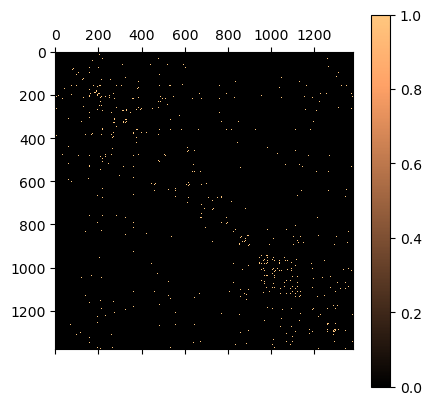

In [16]:
plt.matshow(southpark.social_tie_matrix(), cmap='copper')
plt.colorbar()
plt.show()

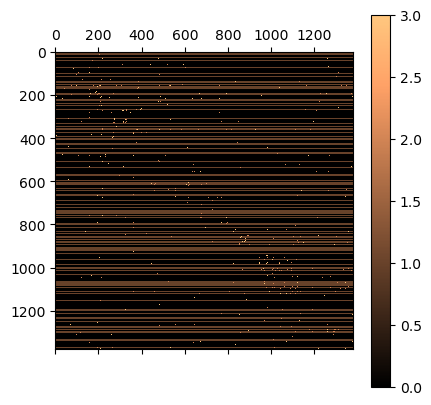

In [17]:
plt.matshow(priority_matrix, cmap='copper')
plt.colorbar()
plt.show()